In [7]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

In [8]:
def plot_elbow_method(datas, max_clusters=5):
    inertia = []
    k_range = range(1, max_clusters+1)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(datas)
        inertia.append(kmeans.inertia_)
    
    # Plotting
    plt.figure(figsize=(8, 3))
    plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.grid(True)
    plt.xticks(k_range)
    plt.show()
    

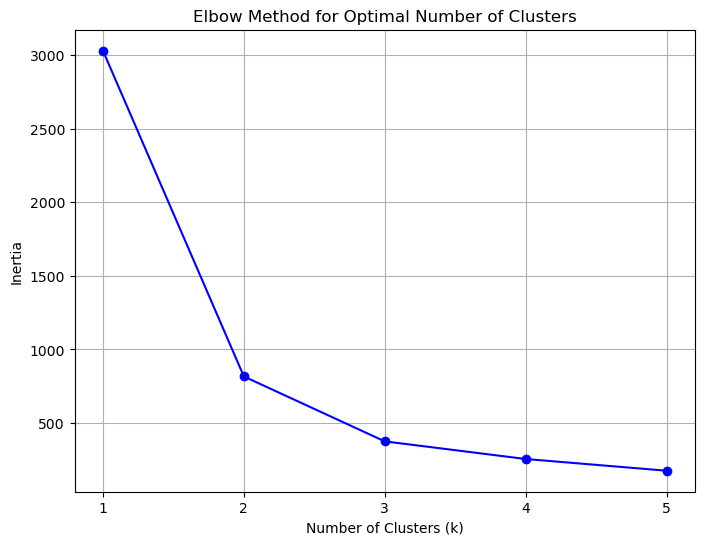

In [9]:
# Read file with baseline features
X = pd.read_csv('C:/Users/Utente/Desktop/ClusteringICSE2label/Feature/Baseline/baselineFeatures.csv')

# Remove the ID column
X = X.iloc[:, 1:] 
plot_elbow_method(X, max_clusters = 5) 


Cluster sizes for 2 clusters: {0: 7, 1: 15}
For 2 clusters, the average silhouette_score is: 0.6402263458401651
Cluster sizes for 3 clusters: {0: 7, 1: 10, 2: 5}
For 3 clusters, the average silhouette_score is: 0.5636985354251479
Cluster sizes for 4 clusters: {0: 8, 1: 7, 2: 1, 3: 6}
For 4 clusters, the average silhouette_score is: 0.4904435578727963


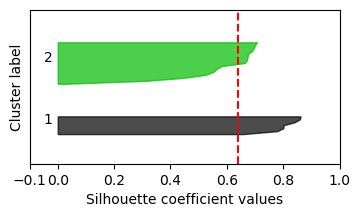

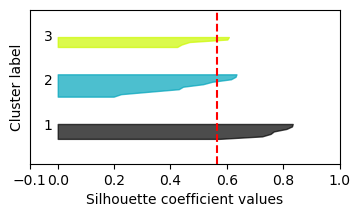

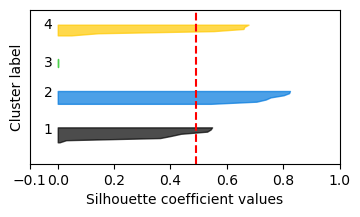

In [13]:
X_numpy = X.values
# Using PCA to plot 4 features in a two-dimensional graph
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_numpy)

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots()
    # Plot dimensions
    fig.set_size_inches(4, 2)  

    # Silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
    cluster_labels = clusterer.fit_predict(X_pca)
    
    # Check number of instances in each cluster
    unique, counts = np.unique(cluster_labels, return_counts=True)
    cluster_sizes = dict(zip(unique, counts))
    print(f"Cluster sizes for {n_clusters} clusters: {cluster_sizes}")

    # Silhouette mean
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For {n_clusters} clusters, the average silhouette_score is: {silhouette_avg}")

    # Silhouette score 
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
        silhouettes_i = sample_silhouette_values[cluster_labels == i]
        silhouettes_i.sort()

        size_cluster_i = silhouettes_i.shape[0]
        y_upper = y_lower + size_cluster_i

        #more space if the size of cluster is 1
        if size_cluster_i == 1:
            y_upper = y_lower + 5


        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, silhouettes_i,
                      facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))
        y_lower = y_upper + 10

    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()
